<a href="https://colab.research.google.com/github/allenphos/ML-course/blob/main/Copy_of_HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/cars.csv') # замініть на ваш шлях до файлу

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
df.select_dtypes(include=['object']).nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення) Fuel_Type, Transmission
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку Brand, Model
- 1 колонки, в яких можна встановити відношення порядку ( First, Second, Third) Owner_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
# Розділення даних на тренувальні і тестові
inputs = df.drop(columns=['Price'])
targets = df['Price']

In [8]:
# inputs_train inputs_test targets_train targets_test
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
df['Fuel_Type'].value_counts(), df['Transmission'].value_counts()

(Fuel_Type
 Petrol    52
 Diesel    48
 Name: count, dtype: int64,
 Transmission
 Automatic    57
 Manual       43
 Name: count, dtype: int64)

In [10]:
# закодування колонок з бінарними значеннями Fuel_Type і Transmission
fuel_type_flag = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_flag'] = X_train.Fuel_Type.map(fuel_type_flag)
X_test['Fuel_Type_flag'] = X_test.Fuel_Type.map(fuel_type_flag)

transmission_flag = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_flag'] = X_train.Transmission.map(transmission_flag)
X_test['Transmission_flag'] = X_test.Transmission.map(transmission_flag)

**OneHotEncoder** Brand

In [11]:
# Ініціалізація OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Виклик fit на тренувальних даних
encoder.fit(X_train[['Brand']])

# Трансформуємо і додаємо закодовані значення до наборів
brand_train_encoded = encoder.transform(X_train[['Brand']])
brand_test_encoded = encoder.transform(X_test[['Brand']])

# Отримання назв колонок
brand_columns = encoder.get_feature_names_out(['Brand'])

# Додавання закодованих колонок до X_train та X_test
X_train = X_train.join(pd.DataFrame(brand_train_encoded, columns=brand_columns, index=X_train.index))
X_test = X_test.join(pd.DataFrame(brand_test_encoded, columns=brand_columns, index=X_test.index))



**OrdinalEncoder** Owner_Type

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

**Model**

In [13]:
# Перевіряємо частоту кожної моделі
average_prices = df.groupby('Model')['Price'].mean()

# Визначимо границі для кожного класу цін
price_thresholds = average_prices.quantile([0.33, 0.66])
luxury_threshold = price_thresholds[0.66]
mid_range_threshold = price_thresholds[0.33]

def assign_price_class(model):
        price = average_prices.loc[model]
        if price >= luxury_threshold:
            return 'Luxury'
        elif price >= mid_range_threshold:
            return 'Mid-range'
        else:
            return 'Economy'

df['Price_Class'] = df['Model'].apply(assign_price_class)

print(df['Price_Class'].value_counts())

Price_Class
Luxury       36
Economy      34
Mid-range    30
Name: count, dtype: int64


In [14]:
# Додаємо колонку 'Price_Class' до X_train та X_test
X_train['Price_Class'] = X_train['Model'].apply(assign_price_class)
X_test['Price_Class'] = X_test['Model'].apply(assign_price_class)

# Ініціалізація OrdinalEncoder з визначеним порядком категорій
ordenc = OrdinalEncoder(categories=[['Economy', 'Mid-range', 'Luxury']])

# Навчання на тренувальних даних
ordenc.fit(X_train[['Price_Class']])

# Трансформуємо тренувальний та тестовий набори
X_train['Price_Class_Codes'] = ordenc.transform(X_train[['Price_Class']])
X_test['Price_Class_Codes'] = ordenc.transform(X_test[['Price_Class']])

Очікуваний результат після трансформацій:

In [15]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_flag,Transmission_flag,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price_Class,Price_Class_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Mid-range,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Economy,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Luxury,2.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_flag,Transmission_flag,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price_Class,Price_Class_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Luxury,2.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Economy,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Economy,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mid-range,1.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Economy,0.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [16]:
# Видалення оригінальних колонок
X_train = X_train.drop(['Fuel_Type', 'Transmission', 'Price_Class', 'Owner_Type', 'Brand', 'Model'], axis=1)
X_test = X_test.drop(['Fuel_Type', 'Transmission', 'Price_Class', 'Owner_Type', 'Brand', 'Model'], axis=1)

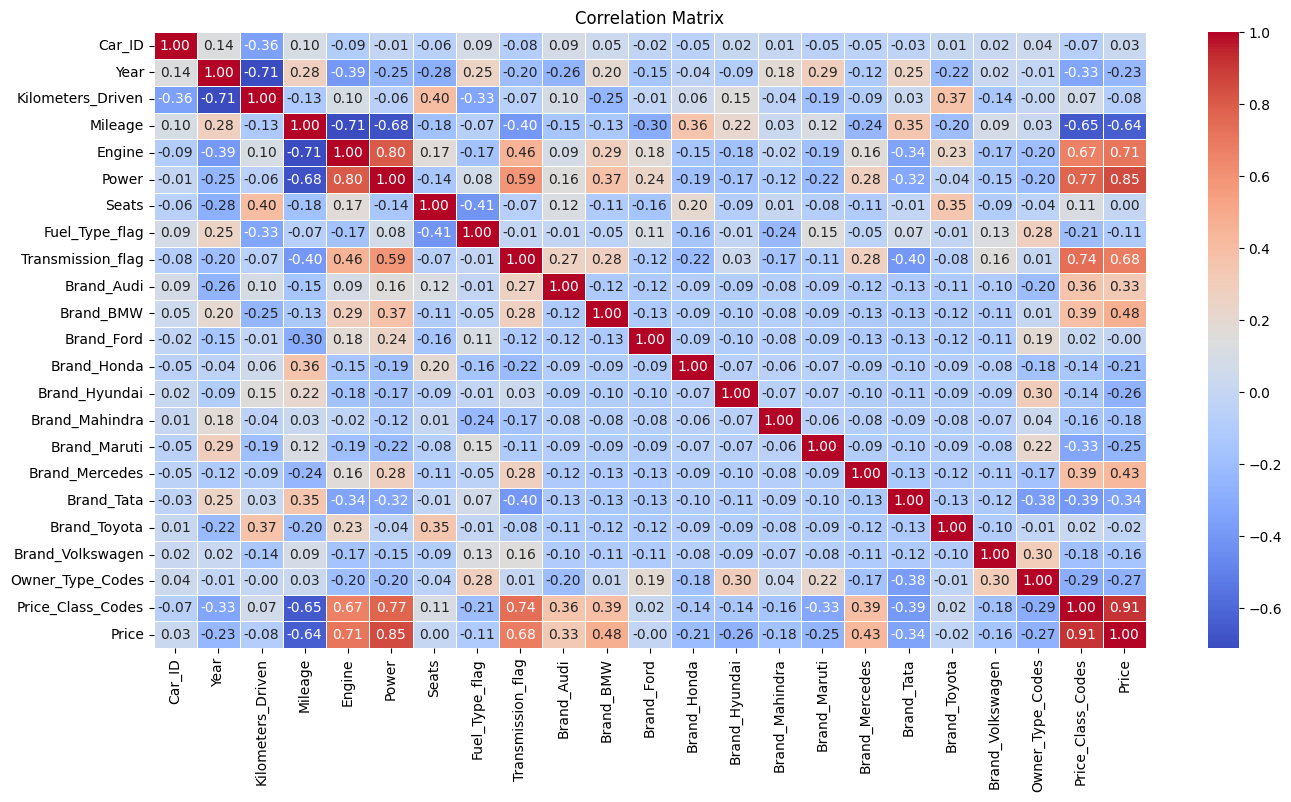


Колонки, які корелюють з Price більше ніж 0.5 або менше ніж -0.5:
Mileage             -0.638404
Engine               0.710561
Power                0.849137
Transmission_flag    0.680731
Price_Class_Codes    0.914731
Price                1.000000
Name: Price, dtype: float64


In [17]:
# Об'єднуємо X_train і y_train в один DataFrame
X_train_with_y = pd.concat([X_train, y_train], axis=1)

# Побудова матриці кореляції
correlation_matrix = X_train_with_y.corr()

# Фільтруємо колонки, де кореляція з Price більша за 0.5 або менша за -0.5
correlation_with_target = correlation_matrix['Price']
strong_correlations = correlation_with_target[correlation_with_target.abs() > 0.5]

# Побудова теплової карти для матриці кореляції
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Додаємо назву та налаштовуємо відображення
plt.title('Correlation Matrix')
plt.show()

# Виводимо результати
print("\nКолонки, які корелюють з Price більше ніж 0.5 або менше ніж -0.5:")
print(strong_correlations)

Кореляція з пробігом негативна означає, що чим більше пробіг автомобіля, тим менша ймовірність високої ціни.

Категорії Engine та Power мають сильну позитивну кореляцію, тобто сильний зв'язок з ціною, це означає, що чим більше значення, тим більша ціна.

Transmission_flag має позитивну кореляцію з ціною. Якщо у автомобіля Automatic Transmission, скоріш за все він коштує дорожче.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [18]:
# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Тренуємо модель на числових даних
model.fit(X_train, y_train)

# Робимо прогнози на тренувальному наборі
train_predictions = model.predict(X_train)

# Обчислюємо RMSE
loss_train = root_mean_squared_error(y_train, train_predictions)


In [19]:
# Робимо передбачення на тестових даних
test_predictions = model.predict(X_test)

# Обчислюємо RMSE
loss_test = root_mean_squared_error(y_test, test_predictions)

In [20]:
print("RMSE на тренувальному наборі:", loss_train)
print("RMSE на тестовому наборі:", loss_test)

RMSE на тренувальному наборі: 200018.3356339149
RMSE на тестовому наборі: 238421.23842360164


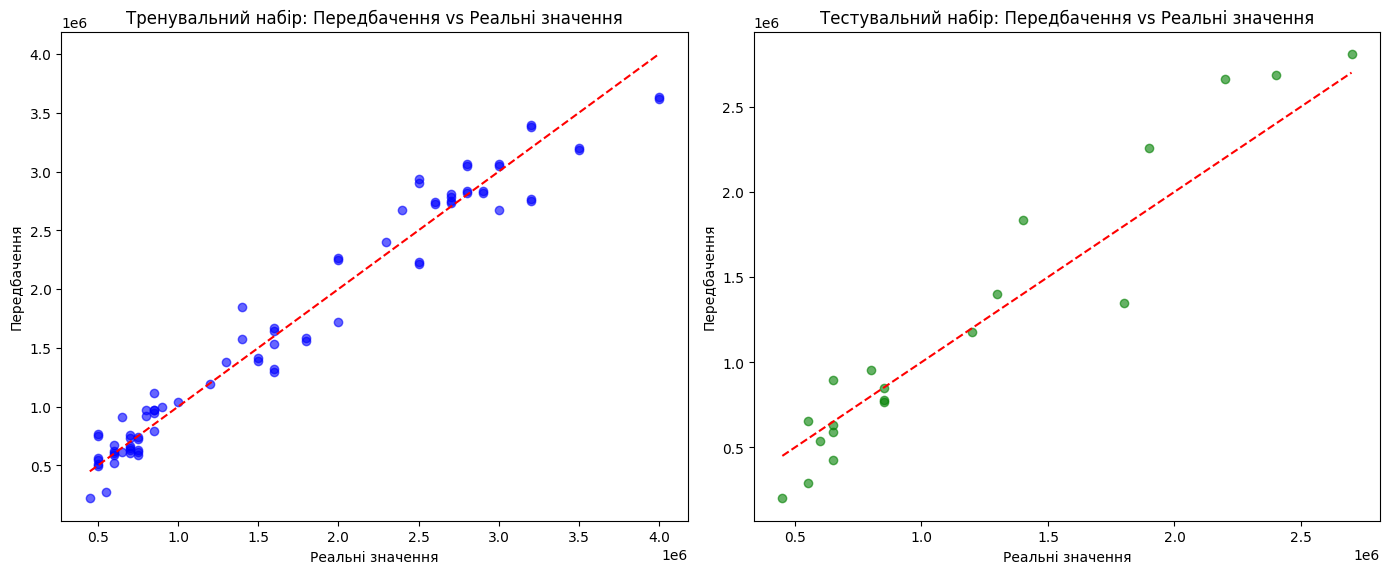

In [21]:
# Створюємо графік для тренувального набору
plt.figure(figsize=(14, 6))

# Графік для тренувального набору
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Тренувальний набір: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Графік для тестувального набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Тестувальний набір: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Показуємо графік
plt.tight_layout()
plt.show()

Модель на тренувальному наборі має високу точність передбачення, бо точки лежать близько до лінії рівності.

На тестувальному наборі, де даних лише 20%, модель має добру тенденцію.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [22]:
# Ініціалізація StandardScaler
scaler = StandardScaler()

# Масштабування тренувального набору (викликаємо fit та transform)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Масштабування тестового набору (викликаємо лише transform)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [23]:
# Тренуємо модель на відмасштабованих даних
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Перегляд коефіцієнтів моделі
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Аналіз коефіцієнтів
print("\nНайвпливовіші колонки:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(5))

              Feature    Coefficient
5               Power  435496.753081
21  Price_Class_Codes  260389.889836
16     Brand_Mercedes  175126.744282
9          Brand_Audi  165896.115609
10          Brand_BMW  160223.157440
20   Owner_Type_Codes   77141.045853
8   Transmission_flag   26343.176946
4              Engine   17287.079786
0              Car_ID   14381.488690
18       Brand_Toyota   11631.643280
1                Year   -2169.794044
6               Seats  -16317.111193
17         Brand_Tata  -29084.619186
3             Mileage  -58997.950048
19   Brand_Volkswagen  -59976.048167
12        Brand_Honda  -60832.220132
15       Brand_Maruti  -70013.069782
2   Kilometers_Driven  -87830.727080
11         Brand_Ford -116981.324545
14     Brand_Mahindra -117738.208154
7      Fuel_Type_flag -140958.970696
13      Brand_Hyundai -145636.784703

Найвпливовіші колонки:
              Feature    Coefficient
5               Power  435496.753081
21  Price_Class_Codes  260389.889836
16     Brand_M

Коефіцієнти моделі відображають вплив кожної змінної на передбачення. Змінні з позитивними коефіцієнтами збільшують значення передбачення.

Чим більше потужність двигуна, тим більше ціна. Те ж саме для авто брендів Mercedes, BMW, Audi - вони стоять дорожче.

Price_Class_Codes ділить моделі авто на бюджетні та люксові. Люксових трохи більше, тож логічно, що вони впливають на ціну позитивно.

Fuel_Type_flag має негативний коефіцієнт (зменшує передбачення), бо авто на дизелі коштують дешевше. Також бренди Мahindra та Hyundai оцінюються нижче.

Результати відповідають логіці та реальному ринку автомобілів, що підтверджує адекватність моделі.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [24]:
# Додаємо константу для перехоплення
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Створення та тренування моделі
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

# Виведення звіту
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     71.03
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           9.61e-34
Time:                        22:25:08   Log-Likelihood:                -1090.0
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      58   BIC:                             2276.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.63e+0

p-значення менше 0.05 вказує на те, що коефіцієнт є статистично значущим, тобто змінна має значний вплив на цільову змінну.

Стат значущі змінні:

Fuel_Type_flag: p-значення = 0.004

Brand_Maruti: p-значення = 0.037

Brand_Ford: p-значення = 0.001  

Price_Class_Codes: p-значення = 0.016

const, Power, Brand_Mercedes, Brand_Audi, Brand_BMW, Brand_Hyundai, Brand_Mahindra: p-значення = 0.000


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [25]:
X_train_stat_sign = X_train_scaled[['Power', 'Kilometers_Driven', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Brand_Toyota', 'Fuel_Type_flag',
 'Transmission_flag', 'Owner_Type_Codes', 'Price_Class_Codes']
]

# Тренуємо модель на стат значимих ознаках
model = LinearRegression()
model.fit(X_train_stat_sign, y_train)

results_significant = sm.OLS(y_train, X_train_stat_sign)
# Додаємо константу для перехоплення
X_train_stat_sign_with_const = sm.add_constant(X_train_stat_sign)

# Створення та тренування моделі
model = sm.OLS(y_train, X_train_stat_sign_with_const)
results = model.fit()

# Виведення звіту
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     131.4
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.23e-41
Time:                        22:25:08   Log-Likelihood:                -1093.4
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      67   BIC:                             2244.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.55e+0

Модель навчена на всіх ознаках пояснює 96% варіації у залежній змінній, тобто
R2 -  0.963,  Adjusted R-squared - 0.949

А результати моделі навченої на значущих ознаках:
R2 -  0.959 та Adjusted R-squared - 0.952

R-squared та Adjusted R-squared не значно зменшились, але нова модель має вищий Adjusted R-squared, що свідчить про її більшу ефективність, оскільки вона досягає подібного рівня пояснювальної здатності з меншою кількістю ознак.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [26]:
# Відбір ознак з p-value < 0.25 з завдання 7
features_p_value_below_025 = ['Power', 'Fuel_Type_flag', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Owner_Type_Codes', 'Kilometers_Driven',
'Mileage', 'Engine', 'Brand_Honda', 'Brand_Maruti', 'Brand_Volkswagen', 'Seats',
'Transmission_flag', 'Brand_Tata', 'Brand_Toyota']

# Формуємо X_train з обраними ознаками
X_train_p_value_filtered = X_train_scaled[features_p_value_below_025]

# Додаємо константу для моделі
X_train_p_value_filtered_with_const = sm.add_constant(X_train_p_value_filtered)

# Створення та тренування моделі
model_p_value_filtered = sm.OLS(y_train, X_train_p_value_filtered_with_const)
results_p_value_filtered = model_p_value_filtered.fit()

# Виведення звіту
print(results_p_value_filtered.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     78.43
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           2.64e-35
Time:                        22:25:08   Log-Likelihood:                -1094.1
No. Observations:                  80   AIC:                             2226.
Df Residuals:                      61   BIC:                             2271.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.69e+0

 R-squared 0.959 не змінився з останньої моделі, Adjusted R-squared став менше 0.946, що вказує на меншу ефективність порівняно з іншими моделями.

 Логічно залишити найпростішу та найефективнішу модель, це буде модель зі статистично значущими ознаками, бо:
 - Найвищий Adjusted R-squared, що свідчить про найкращий баланс між точністю та складністю.
 - Менша кількість ознак зменшує ризик перенавчання.


In [27]:
# Трансформуємо тестовий набір
X_test_stat_sign = X_test_scaled[['Power', 'Kilometers_Driven', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Brand_Toyota', 'Fuel_Type_flag',
 'Transmission_flag', 'Owner_Type_Codes', 'Price_Class_Codes']]

# 1. Масштабування даних
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_stat_sign)  # Тренуємо на X_train
#X_test_scaled = scaler.transform(X_test_stat_sign)  # Трансформуємо X_test

# 2. Тренування моделі
model = LinearRegression()
model.fit(X_train_stat_sign, y_train)

# 3. Прогнози
train_predictions = model.predict(X_train_stat_sign)
test_predictions = model.predict(X_test_stat_sign)

# 4. Оцінка якості моделі
loss_train = root_mean_squared_error(y_train, train_predictions)
loss_test = root_mean_squared_error(y_test, test_predictions)

# 5. Коефіцієнти моделі
coefficients = pd.DataFrame({
    'Feature': X_train_stat_sign.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# 6. Вивід результатів
print("\nКоефіцієнти моделі:")
print(coefficients)

print("\nRMSE на тренувальному наборі:", loss_train)
print("RMSE на тестовому наборі:", loss_test)



Коефіцієнти моделі:
              Feature    Coefficient
0               Power  451588.309288
6      Brand_Mercedes  265108.359865
11  Price_Class_Codes  254008.535064
3           Brand_BMW  252654.680870
2          Brand_Audi  242839.595725
7        Brand_Toyota   95167.549005
10   Owner_Type_Codes   45655.847309
9   Transmission_flag   35242.156363
5      Brand_Mahindra  -55929.970910
1   Kilometers_Driven  -75649.841418
4       Brand_Hyundai  -82864.114803
8      Fuel_Type_flag -119633.831697

RMSE на тренувальному наборі: 208749.2993804312
RMSE на тестовому наборі: 252730.15710276633


Було:

RMSE на тренувальному наборі: 200018.3356339149

RMSE на тестовому наборі: 238421.23842360164

Стало:

RMSE на тренувальному наборі: 208749.2993804312

RMSE на тестовому наборі: 252730.15710276633


Якість моделі трохи погіршилася після того, як залишили лише статистично значущі ознаки. Можливо була втрата важливої інформації, що призвело до зменшення перенавчання та до погіршення точності на тестових даних.

Треба ще експрементувати щоб покращити якість моделі.

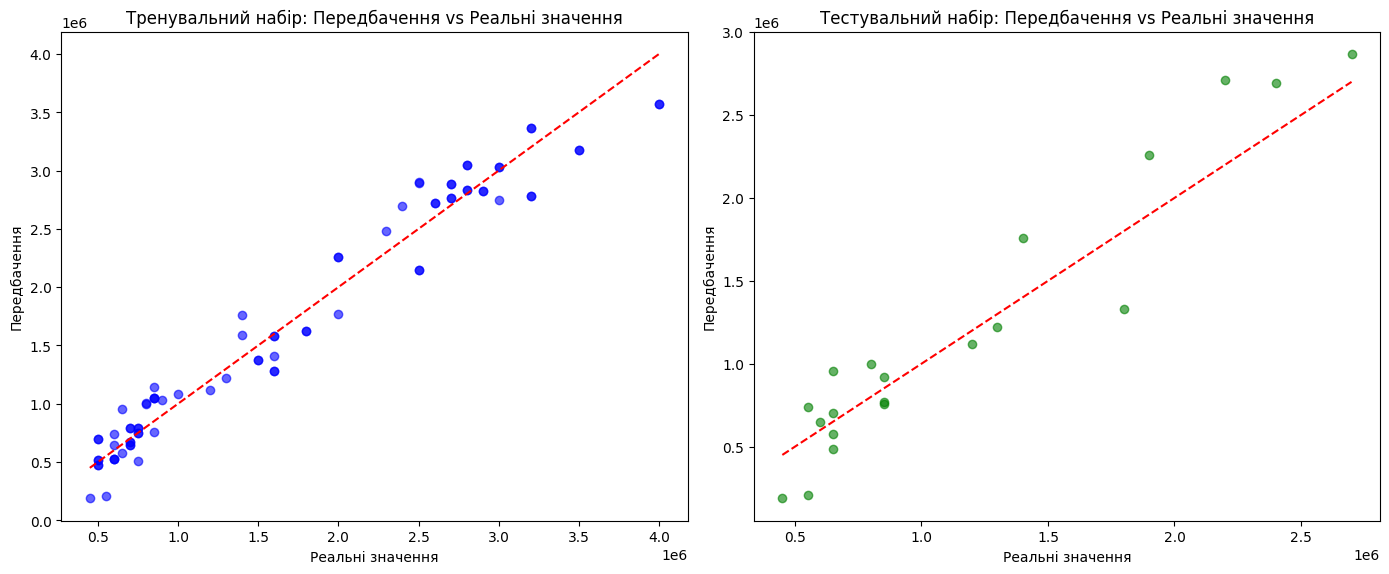

In [28]:
# 7. Графіки розсіювання
plt.figure(figsize=(14, 6))

# Графік для тренувального набору
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Тренувальний набір: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Графік для тестувального набору
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Тестувальний набір: Передбачення vs Реальні значення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')

# Показуємо графіки
plt.tight_layout()
plt.show()